In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import pylab

import matplotlib.pyplot as plt

In [2]:
loans_income = pd.read_csv('/content/sample_data/loans_income.csv')
sp500_px = pd.read_csv('/content/sample_data/sp500_px.csv')

In [3]:
loans_income.shape

(50000, 1)

In [6]:
#Take a 1000 Samples
samples = loans_income.sample(n=1000)
samples.head

<bound method NDFrame.head of             x
48512   90000
21502   56000
28777   80000
3075   125000
22586   40000
...       ...
13225   50000
28996   53000
17992   72000
3043    35000
6708    36000

[1000 rows x 1 columns]>

In [7]:
samples.tail

<bound method NDFrame.tail of             x
48512   90000
21502   56000
28777   80000
3075   125000
22586   40000
...       ...
13225   50000
28996   53000
17992   72000
3043    35000
6708    36000

[1000 rows x 1 columns]>

In [9]:
#mean of 5 numbers
sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5

48512        NaN
21502        NaN
28777        NaN
3075         NaN
22586    78200.0
          ...   
13225    48400.0
28996    39000.0
17992    47000.0
3043     49000.0
6708     49200.0
Name: x, Length: 1000, dtype: float64

In [10]:
sample_mean_5 = sample_mean_5.dropna()
sample_mean_5

22586    78200.0
23721    69075.4
49799    84275.4
25846    85275.4
315      80275.4
          ...   
13225    48400.0
28996    39000.0
17992    47000.0
3043     49000.0
6708     49200.0
Name: x, Length: 996, dtype: float64

In [11]:
#mean of 20 numbers
sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20

48512         NaN
21502         NaN
28777         NaN
3075          NaN
22586         NaN
           ...   
13225    59056.85
28996    58156.85
17992    58006.85
3043     56706.85
6708     53756.85
Name: x, Length: 1000, dtype: float64

In [12]:
sample_mean_20 = sample_mean_20.dropna()
sample_mean_20

39474    75213.75
26265    74213.75
41275    75713.75
15389    74963.75
5806     70213.75
           ...   
13225    59056.85
28996    58156.85
17992    58006.85
3043     56706.85
6708     53756.85
Name: x, Length: 981, dtype: float64

In [13]:
# mean of 30 numbers
sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30

48512             NaN
21502             NaN
28777             NaN
3075              NaN
22586             NaN
             ...     
13225    55956.433333
28996    54589.766667
17992    56623.100000
3043     55723.100000
6708     55256.433333
Name: x, Length: 1000, dtype: float64

In [15]:
sample_mean_30 = sample_mean_30.dropna()
sample_mean_30

9469     71609.166667
49580    70509.166667
21791    70642.500000
34880    69142.500000
17677    67309.166667
             ...     
13225    55956.433333
28996    54589.766667
17992    56623.100000
3043     55723.100000
6708     55256.433333
Name: x, Length: 971, dtype: float64

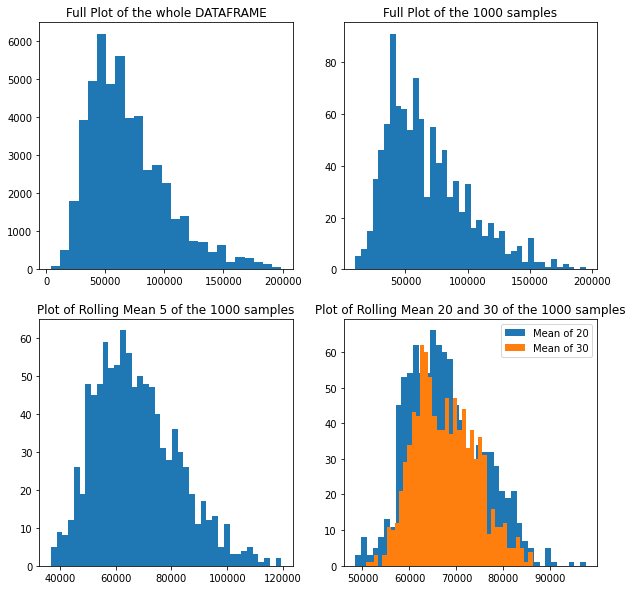

In [40]:
fig = plt.figure(figsize=(10,10))
#The full distribution of the plot:
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Full Plot of the whole DATAFRAME')

#distribution of 1000 samples:

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Full Plot of the 1000 samples')


#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Plot of Rolling Mean 5 of the 1000 samples')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Plot of Rolling Mean 20 and 30 of the 1000 samples')
ax.legend()
plt.show()

plt.show()

In [27]:

#Calculating a rolling mean:
print('Total Population STD : ',loans_income.x.std())
print('Total Population Mean : ',loans_income.x.mean())
print('Total Population Median : ',np.median(loans_income.x))
print('Total Population Standard Error:',stats.sem(loans_income.x, ddof=1))

Total Population STD :  32872.03536985002
Total Population Mean :  68760.51844
Total Population Median :  62000.0
Total Population Standard Error: 147.00821129152527


In [28]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)

In [29]:
bootstrap_1000.shape

(1000,)

In [30]:
bootstrap_10000

array([ 54000,  40000,  85000, ..., 120000,  65000,  50000])

In [32]:
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
arr_bootstraps

[array([ 75000,  80000,  60000,  40000,  74000,  62042,  85000, 152004,
         75000,  45000, 120000, 186000,  80000,  28000,  51000,  62200,
         25000,  90000,  48000, 110000,  50000, 135000,  55000,  65000,
         30000,  70000,  68000,  92000,  70000,  38000,  48000, 110000,
         50000,  64070,  70000,  80000,  90000,  70000,  33000,  44000,
         95000,  71000,  84000,  65000,  65000,  36000,  80200,  98303,
         52512, 103000,  85000,  70000,  60000, 120000, 100000,  28000,
         14000,  42000,  55000,  65000, 130000, 190000,  79000,  30000,
         53000, 125000,  60000,  51094,  33000,  45000,  36000,  43500,
         25000,  53909,  70000, 125000,  37000, 140000,  68000,  51688,
         35000,  77424,  48000,  53500,  21000,  48000,  13008,  60000,
         45000, 155000,  85000,  42640,  62000,  51000, 145000,  50000,
         26000,  35000,  67200,  44000,  45000,  44000, 104000, 171000,
         55000,  61800,  74000, 115000,  20157,  28600,  92000, 

In [33]:
#Calculating a rolling mean:
for i in range(len(arr_bootstraps)):
    print('Bootstrap Stats for {} examples \n'.format(len(arr_bootstraps[i])))
    print('------------------------------------------------------------------------------\n')
    print('Bootstrap STD : ',np.std(arr_bootstraps[i],ddof=1))
    print('Bootstrap Mean : ',np.mean(arr_bootstraps[i]))
    print('Bootstrap Median: ',np.median(arr_bootstraps[i]))
    print('Boostrap Bias, ',loans_income.x.mean() - np.mean(arr_bootstraps[i],axis=0))
    print('Standard Error:',stats.sem(arr_bootstraps[i], ddof=1))
    print('\n------------------------------------------------------------------------------\n')

Bootstrap Stats for 1000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  31986.344172014884
Bootstrap Mean :  67587.93
Bootstrap Median:  62668.0
Boostrap Bias,  1172.5884400000068
Standard Error: 1011.497016056197

------------------------------------------------------------------------------

Bootstrap Stats for 10000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32696.738264418076
Bootstrap Mean :  68387.8096
Bootstrap Median:  61000.0
Boostrap Bias,  372.7088400000066
Standard Error: 326.96738264418076

------------------------------------------------------------------------------

Bootstrap Stats for 20000 examples 

------------------------------------------------------------------------------

Bootstrap STD :  32605.941271453397
Bootstrap Mean :  68559.2899
Bootstrap Median:  62000.0
Boostrap Bias,  201.22853999999643
Standard Error: 230.55882180015016

-----

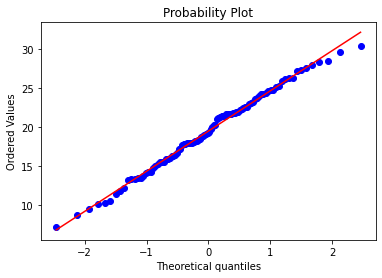

In [41]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [42]:
nflx = sp500_px.loc[:,'NFLX']
pylab.show()

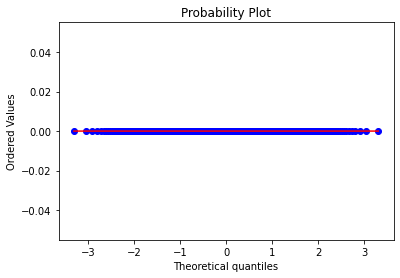

In [43]:

stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1280: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


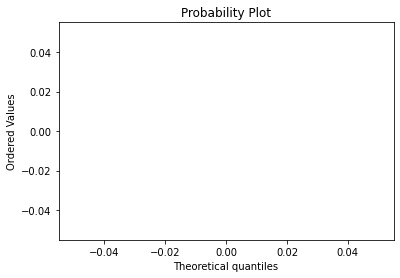

In [47]:
treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()
